In [4]:
from extract_data import extract_data_to_csv

path_to_file = r'\picture_of_VN_edu\data_for_analyze\extractedFile'

gdp_code_list = ['NY.GDP.MKTP.KD.ZG', 'NY.GDP.MKTP.CD', 'NY.GDP.PCAP.PP.CD']
api_gdp = [f"https://api.worldbank.org/v2/countries/vn;sg;th;id;my;us;z4;1w/indicators/{v}?format=json&per_page=1000" for v in gdp_code_list]

api_pop_list = ['https://api.worldbank.org/v2/country/vn/indicator/SP.POP.TOTL?format=json&per_page=1000',
        'https://api.worldbank.org/v2/country/vn/indicator/SP.RUR.TOTL?format=json&per_page=1000',
        'https://api.worldbank.org/v2/country/vn/indicator/SP.URB.TOTL?format=json&per_page=1000',
        'https://api.worldbank.org/v2/country/vn/indicator/SP.POP.GROW?format=json&per_page=1000',
        'https://api.worldbank.org/v2/country/vn/indicator/SP.DYN.CBRT.IN?format=json&per_page=1000'
        ]

k_12 = 'https://pxweb.gso.gov.vn:443/sq/2156adec-bb77-4bde-8c13-342161c4a474'
higher_edu = 'https://pxweb.gso.gov.vn:443/sq/66e42bba-b202-4941-9ee0-3f48fff92b81'
edu_rate = 'https://pxweb.gso.gov.vn:443/sq/26d69546-6c6c-4ed6-a7af-680847767667'
extractor = extract_data_to_csv()

gdp_csv = extractor.gdp_compare_to_csv(api_gdp_capital= api_gdp[2], api_gdp_total= api_gdp[1], api_gpd_growth= api_gdp[0])
gdp_csv.to_csv(f"{path_to_file}\\gdp_compare.csv")

pop_csv = extractor.population_to_csv(api_pop= api_pop_list, gdp_compare= gdp_csv)
pop_csv.to_csv(f"{path_to_file}\\population.csv")

edu_csv = extractor.vietNamStudent_to_csv(api_k_12= k_12, api_higher_edu= higher_edu)
edu_csv.to_csv(f"{path_to_file}\\VietnamStudent.csv")

edu2_csv = extractor.vietNamStudent2_to_csv(api_edu_rate= edu_rate, vnStd= edu_csv)
edu2_csv.to_csv(f"{path_to_file}\\VietnamStudent2.csv")

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

gdp = pd.read_csv(r'..\data_for_analyze\extractedFile\gdp_compare.csv', index_col= 0)
pop = pd.read_csv(r'..\data_for_analyze\extractedFile\population.csv', index_col= 0)
edu = pd.read_csv(r'..\data_for_analyze\extractedFile\VietnamStudent.csv', index_col= 0)
edu2 = pd.read_csv(r'..\data_for_analyze\extractedFile\VietnamStudent2.csv', index_col= 0)
pisa = pd.read_csv(r'..\data_for_analyze\extractedFile\Pisa_GDP.csv')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20088\2756674874.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp['color_cats'] = ['blue' if x in rapid_year else 'red' for x in gdp['year']]


Text(0.5, 1.0, 'Vietnam GDP and GDP PPP 1990 - 2019')

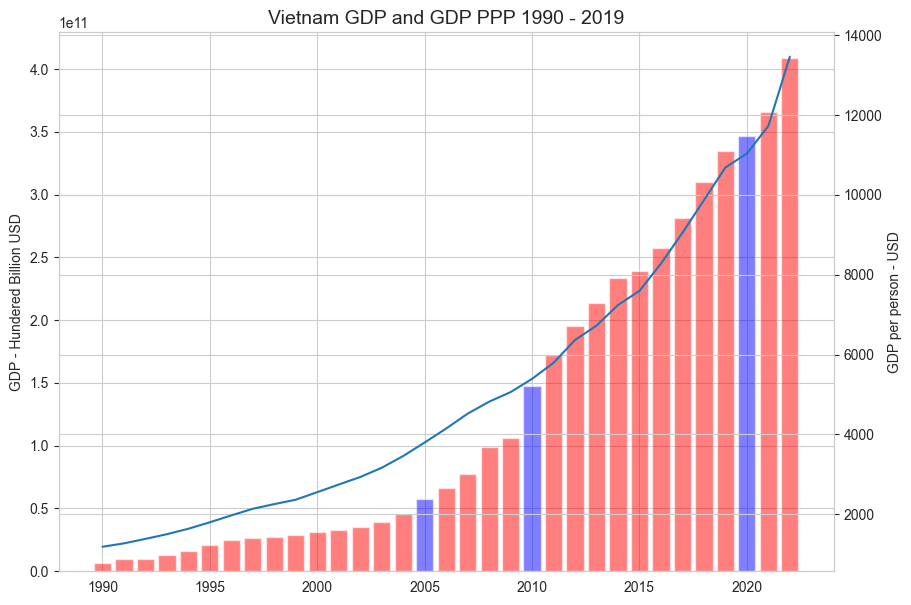

In [6]:
sns.set_style('whitegrid')
gdp = gdp.query('year >= 1990')
fig, ax = plt.subplots(figsize =(10,7))
rapid_year = [2005, 2010, 2020]
gdp['color_cats'] = ['blue' if x in rapid_year else 'red' for x in gdp['year']]
ax.bar(gdp['year'], gdp['Viet Nam'], color = gdp['color_cats'], alpha = 0.5)
ax2 = ax.twinx()
ax2.plot(gdp['year'], gdp['Viet Nam GDP PPP'])
ax.set_ylabel('GDP - Hundered Billion USD')
ax2.set_ylabel('GDP per person - USD')
ax.set_title('Vietnam GDP and GDP PPP 1990 - 2019', size =14)

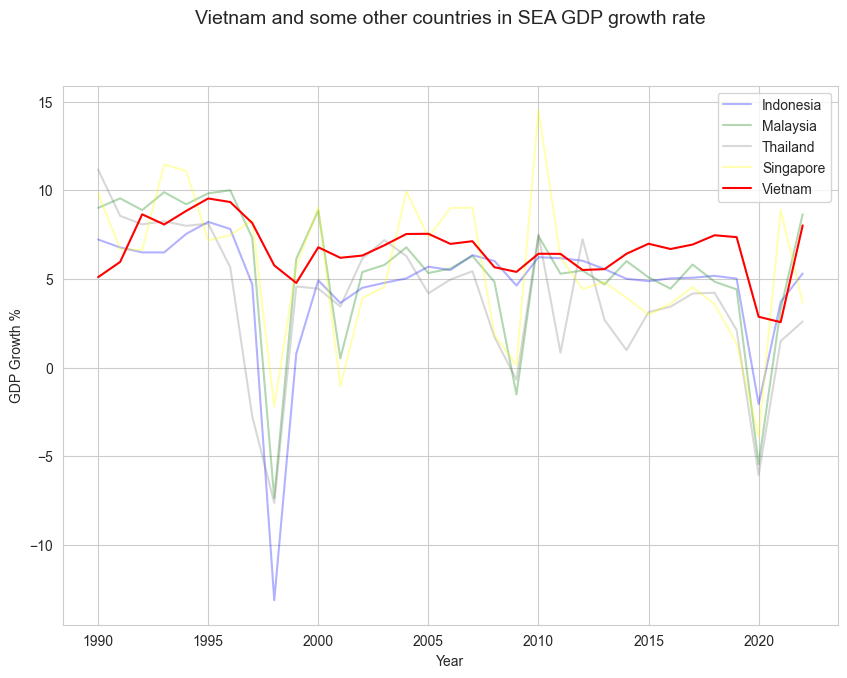

In [9]:
fig, ax = plt.subplots(figsize =(10,7))
ax.plot(gdp['year'], gdp['Indonesia %'], color = 'Blue', alpha = 0.3)
ax.plot(gdp['year'], gdp['Malaysia %'], color = 'Green', alpha = 0.3)
ax.plot(gdp['year'], gdp['Thailand %'], color = 'Gray', alpha = 0.3)
ax.plot(gdp['year'], gdp['Singapore %'], color = 'Yellow', alpha = 0.3)
ax.plot(gdp['year'], gdp['Viet Nam %'], color = 'Red')
ax.set_xlabel('Year')
ax.set_ylabel('GDP Growth %')
ax.set_title('Vietnam and some other countries in SEA GDP growth rate', y = 1.1, size = 14)
ax.legend(['Indonesia','Malaysia','Thailand','Singapore','Vietnam'])
plt.show()

In [23]:
X = np.array([pop['Newborn']])
Y = pop.index.tolist()

,year,"Population, total",Rural population,Urban population,Population growth (annual %),"Birth rate, crude (per 1,000 people)",Newborn,GDPinUSD,GDP growth %
0,1960,32718461.0,27908847.0,4809614.0,NaN,41.331,1352287.0,NaN,NaN
1,1961,33621982.0,28568262.0,5053720.0,2.724060,35.609,1197245.0,NaN,NaN
2,1962,34533889.0,29226376.0,5307513.0,2.676105,39.800,1374449.0,NaN,NaN
3,1963,35526727.0,29944057.0,5582670.0,2.834415,39.719,1411086.0,NaN,NaN
4,1964,36509166.0,30644334.0,5864832.0,2.727807,38.366,1400711.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
58,2018,94914330.0,60822052.0,34092278.0,0.932840,15.873,1506575.0,3.101065e+11,7.465007
59,2019,95776716.0,60695620.0,35081096.0,0.904491,15.663,1500151.0,3.343653e+11,7.359263
60,2020,96648685.0,60560066.0,36088619.0,0.906299,15.400,1488390.0,3.466157e+11,2.865413
61,2021,97468029.0,60379495.0,37088534.0,0.844182,15.008,1462800.0,3.661376e+11,2.561564


In [39]:
P = []
K = []
for i in Y:
    p = np.sum(X[0][i-10:i-5])
    k = np.sum(X[0][i-18:i-5])
    P.append(p)
    K.append(k)

pop['6_10yo'] = P
pop['6_18yo'] = K

pg = pop[(pop['year'] >= 1990) & (pop['year']< 2022)]
pg

,year,"Population, total",Rural population,Urban population,Population growth (annual %),"Birth rate, crude (per 1,000 people)",Newborn,GDPinUSD,GDP growth %,6_10yo,6_18yo
30,1990,66912613.0,53358125.0,13554488.0,2.185105,28.508,1907545.0,6.471741e+09,5.100918,9245368.0,22403940.0
31,1991,68358820.0,54257079.0,14101741.0,2.138311,27.790,1899692.0,9.613370e+09,5.960844,9387688.0,22748401.0
32,1992,69788747.0,55128923.0,14659824.0,2.070218,26.773,1868454.0,9.866990e+09,8.646047,9486328.0,23045769.0
33,1993,71176405.0,55953907.0,15222498.0,1.968859,25.508,1815568.0,1.318095e+10,8.072731,9540200.0,23354542.0
34,1994,72501087.0,56714700.0,15786387.0,1.844018,23.913,1733718.0,1.628643e+10,8.838981,9561744.0,23647293.0
35,1995,73759110.0,57409666.0,16349444.0,1.720296,22.065,1627495.0,2.073616e+10,9.540480,9565354.0,23918296.0
36,1996,74946448.0,58036281.0,16910167.0,1.596932,20.457,1533179.0,2.465747e+10,9.340017,9558578.0,24162970.0
37,1997,76058603.0,58591745.0,17466858.0,1.473030,19.372,1473407.0,2.684370e+10,8.152084,9537274.0,24357369.0
38,1998,77128424.0,59102740.0,18025684.0,1.396774,18.525,1428804.0,2.720960e+10,5.764455,9492796.0,24486413.0
39,1999,78123713.0,59516988.0,18606725.0,1.282176,18.080,1412477.0,2.868366e+10,4.773587,9399342.0,24529980.0


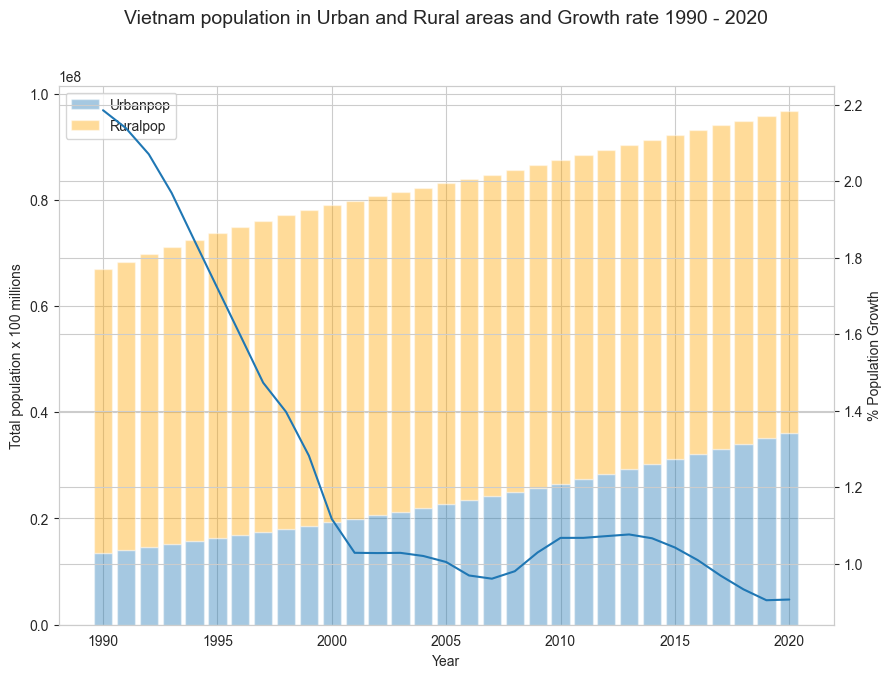

In [36]:
fig, ax = plt.subplots(figsize = (10, 7))
ax.bar(pg['year'], pg['Urban population'], alpha = 0.4)
ax.bar(pg['year'], pg['Rural population'], bottom = pg['Urban population'], color = 'Orange', alpha = 0.4)
ax.set_title('Vietnam population in Urban and Rural areas and Growth rate 1990 - 2020', y = 1.1, size = 14)
ax.legend(['Urbanpop','Ruralpop'])
ax.set_xlabel('Year')
ax.set_ylabel('Total population x 100 millions')
ax2 = ax.twinx()
ax2.plot(pg['year'], pg['Population growth (annual %)'])
ax2.set_ylabel('% Population Growth')
plt.show()

In [43]:
pdu = pd.merge(pg, edu, on = 'year')
pdu1 = pdu.query('year >= 2002')
pdu1

,year,"Population, total",Rural population,Urban population,Population growth (annual %),"Birth rate, crude (per 1,000 people)",Newborn,GDPinUSD,GDP growth %,6_10yo,6_18yo,Total_higher_edu,Higher_public_edu,Higher_private_edu,K_12,Primary,Secondary,Highschool
7,2002,80642308.0,60069649.0,20572659.0,1.027718,18.142,1463013.0,3.506411e+10,6.320821,8578414.0,23855478.0,1020700.0,908800.0,111900.0,17699600.0,8815700.0,6429700.0,2454200.0
8,2003,81475825.0,60217153.0,21258672.0,1.028293,17.879,1456706.0,3.955251e+10,6.899063,8183367.0,23424412.0,1131000.0,993900.0,137100.0,17505400.0,8346000.0,6569800.0,2589600.0
9,2004,82311227.0,60348122.0,21963105.0,1.020116,17.862,1470243.0,4.542785e+10,7.536411,7796603.0,22938895.0,1319800.0,1182000.0,137800.0,17122600.0,7744800.0,6616700.0,2761100.0
10,2005,83142095.0,60460100.0,22681995.0,1.004362,17.465,1452077.0,5.763326e+10,7.547248,7475362.0,22430376.0,1387100.0,1226700.0,160400.0,16650600.0,7304000.0,6371300.0,2975300.0
11,2006,83951800.0,60539322.0,23412478.0,0.969169,16.995,1426761.0,6.637166e+10,6.977955,7273522.0,21943099.0,1666200.0,1456700.0,209500.0,16256600.0,7029400.0,6152000.0,3075200.0
12,2007,84762269.0,60601632.0,24160637.0,0.960768,17.072,1447061.0,7.741443e+10,7.129504,7174589.0,21468323.0,1603500.0,1414700.0,188800.0,15685200.0,6860300.0,5803300.0,3021600.0
13,2008,85597241.0,60664477.0,24932764.0,0.980255,17.143,1467394.0,9.913030e+10,5.661771,7164195.0,21023253.0,1719500.0,1501300.0,218200.0,15127900.0,6731600.0,5468700.0,2927600.0
14,2009,86482923.0,60743875.0,25739048.0,1.029392,17.016,1471593.0,1.060147e+11,5.397898,7192097.0,20572414.0,1956200.0,1656400.0,299800.0,14912100.0,6908000.0,5163200.0,2840900.0
15,2010,87411012.0,60823204.0,26587808.0,1.067430,16.906,1477771.0,1.472012e+11,6.423245,7249863.0,20142965.0,2162100.0,1828200.0,333900.0,14792800.0,7043300.0,4945200.0,2804300.0
16,2011,88349117.0,60890211.0,27458906.0,1.067493,16.929,1495662.0,1.725950e+11,6.413169,7276285.0,19726588.0,2208100.0,1873100.0,335000.0,14782600.0,7101000.0,4926400.0,2755200.0


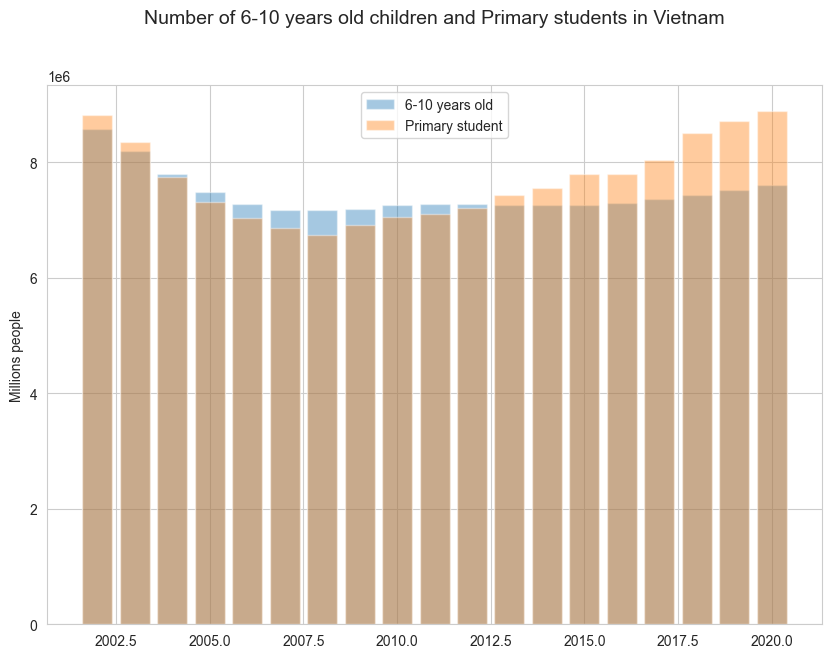

In [44]:
fig, ax = plt.subplots(figsize = (10, 7))
ax.bar(pdu1['year'], pdu1['6_10yo'], alpha = 0.4)
ax.bar(pdu1['year'], pdu1['Primary'], alpha = 0.4)
ax.set_ylabel('Millions people')
ax.set_title('Number of 6-10 years old children and Primary students in Vietnam', y = 1.1, size = 14)
ax.legend(['6-10 years old','Primary student'])
plt.show()

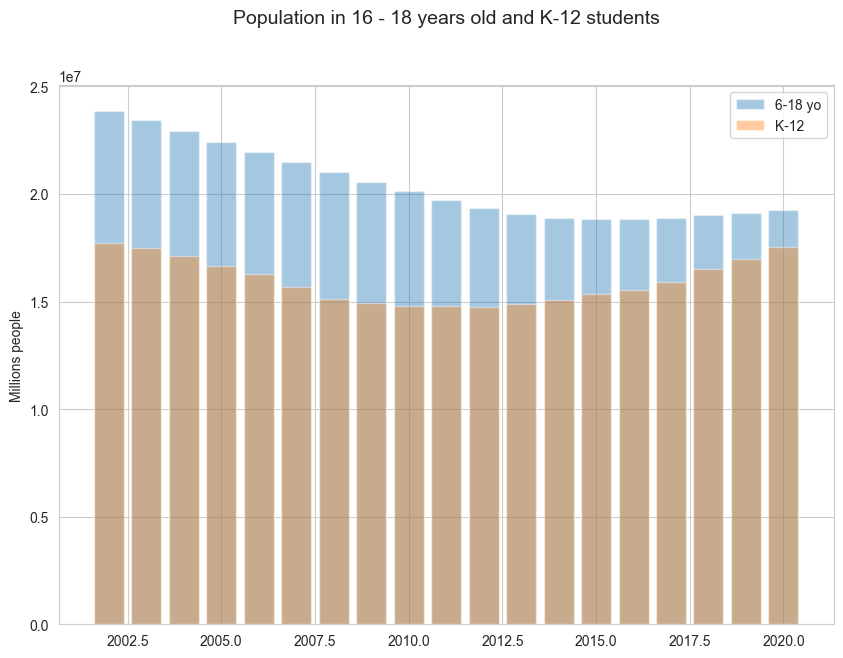

In [46]:
fig, ax = plt.subplots(figsize = (10, 7))
ax.bar(pdu1['year'], pdu1['6_18yo'], alpha = 0.4)
ax.bar(pdu1['year'], pdu1['K_12'], alpha = 0.4)
ax.set_ylabel('Millions people')
ax.set_title('Population in 16 - 18 years old and K-12 students', y = 1.1, size = 14)
ax.legend(['6-18 yo','K-12'])
plt.show()

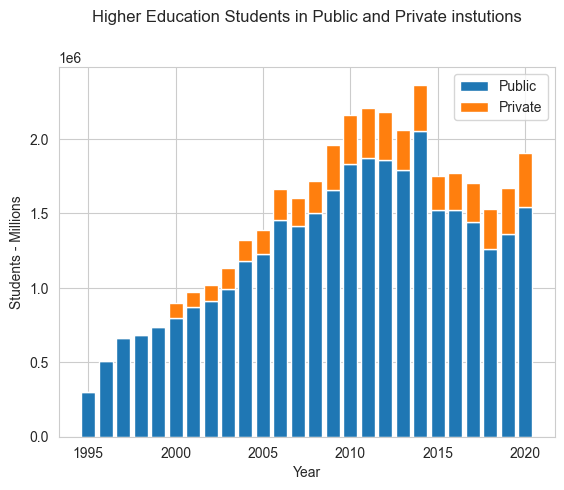

In [50]:
fig, ax = plt.subplots()
ax.bar(pdu['year'], pdu['Higher_public_edu'])
ax.bar(pdu['year'], pdu['Higher_private_edu'], bottom = pdu['Higher_public_edu'])
ax.set_xlabel('Year')
ax.set_ylabel('Students - Millions')
ax.set_title('Higher Education Students in Public and Private instutions', y = 1.1)
ax.legend(['Public', 'Private'])
plt.show()

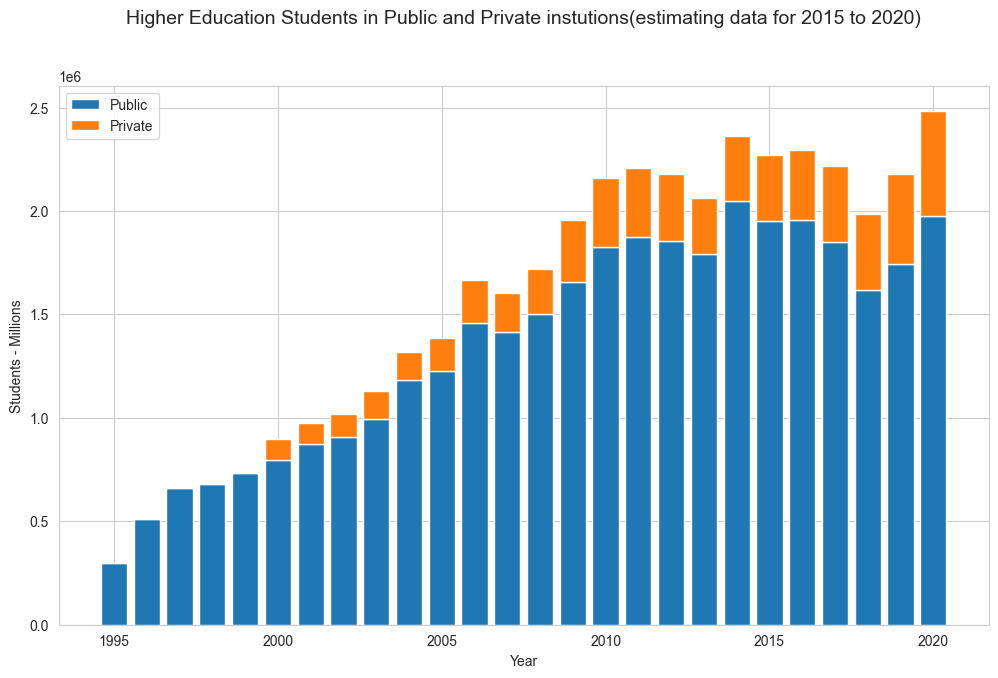

In [54]:
fig, ax = plt.subplots(figsize = (12,7))
ax.bar(edu2['year'], edu2['Higher_public_edu'])
ax.bar(edu2['year'], edu2['Higher_private_edu'], bottom = edu2['Higher_public_edu'])
ax.set_xlabel('Year')
ax.set_ylabel('Students - Millions')
ax.set_title('Higher Education Students in Public and Private instutions(estimating data for 2015 to 2020)', y = 1.1, size = 14)
ax.legend(['Public', 'Private'])
plt.show()

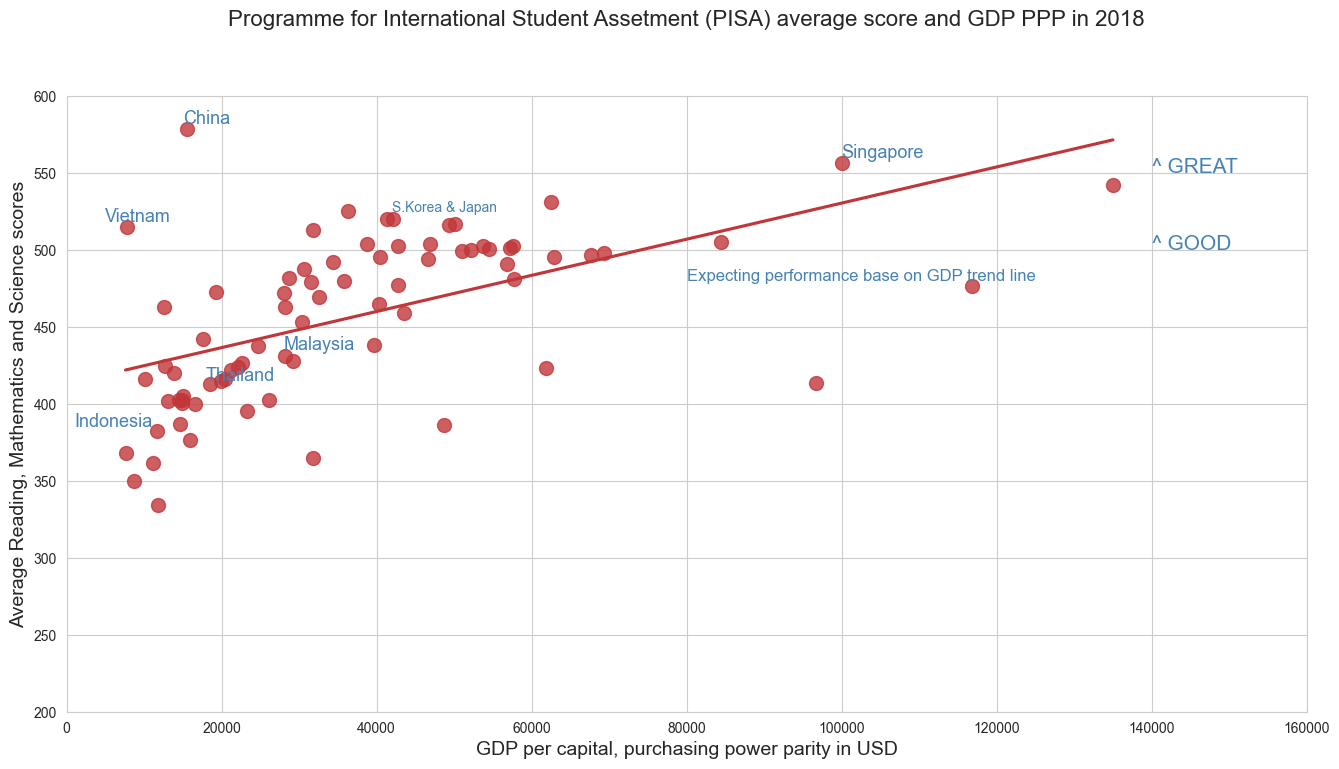

In [59]:
sns.set_palette('RdBu')
g = sns.regplot(x = 'GDP_PPP',y ='Avg_score', data = pisa, ci = False, scatter_kws={"s": 100})
g.figure.set_size_inches(16, 8)
g.set_xlim(0,160000)
g.set_ylim(200, 600)
g.set_title('Programme for International Student Assetment (PISA) average score and GDP PPP in 2018', y = 1.1, size = 16)
g.set_xlabel('GDP per capital, purchasing power parity in USD', size = 14)
g.set_ylabel('Average Reading, Mathematics and Science scores', size= 14)
plt.text(5000, 518, 'Vietnam', size = 13, color = 'steelblue')
plt.text(15000, 582, 'China', size = 13, color = 'steelblue')
plt.text(100000, 560, 'Singapore', size = 13, color = 'steelblue')
plt.text(18000, 415, 'Thailand', size = 13, color = 'steelblue')
plt.text(28000, 435, 'Malaysia', size = 13, color = 'steelblue')
plt.text(1000, 385, 'Indonesia', size = 13, color = 'steelblue')
plt.text(42000, 525, 'S.Korea & Japan', size = 10, color = 'steelblue')
plt.text(80000, 480, 'Expecting performance base on GDP trend line', size = 12, color = 'steelblue')
plt.text(140000, 550, '^ GREAT', size = 15, color = 'steelblue')
plt.text(140000, 500, '^ GOOD', size = 15, color = 'steelblue')
plt.show()